In [26]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt

In [27]:
df=pd.read_excel(r"C:\Users\Hp\Downloads\Online Retail.xlsx")
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [30]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [7]:
df.Country.value_counts()

Country
United Kingdom          495478
Germany                   9495
France                    8557
EIRE                      8196
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               2002
Portugal                  1519
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Unspecified                446
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
Israel                     297
USA                        291
Hong Kong                  288
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58


In [8]:
# recency
df.tail(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [31]:
day="2012-01-01"
day=pd.to_datetime(day)
df['InvoiceDate']=pd.to_datetime(df['InvoiceDate'])


In [32]:
recency=df.groupby(["CustomerID"]).agg({"InvoiceDate":lambda x:((day-x.max()).days)})

In [33]:
recency.head(5)

,InvoiceDate
CustomerID,
12346.0,347
12347.0,24
12348.0,97
12349.0,40
12350.0,332


In [34]:
frequency=df.groupby(["CustomerID"])[["InvoiceNo"]].count()

In [35]:
frequency.head(3)

,InvoiceNo
CustomerID,
12346.0,2
12347.0,182
12348.0,31


In [38]:
df["total"]=df["UnitPrice"]*df["Quantity"]

In [39]:
df["total"].head(3)

0    15.30
1    20.34
2    22.00
Name: total, dtype: float64

In [43]:
money=df.groupby(["CustomerID"])[["total"]].sum()

In [44]:
money.head()

,total
CustomerID,
12346.0,0.00
12347.0,4310.00
12348.0,1797.24
12349.0,1757.55
12350.0,334.40


In [119]:
RFM=pd.concat([recency,frequency,money],axis=1)
recency.columns=["recency"]
frequency.columns=["frequency"]
money.columns=["total"]

In [120]:
RFM

,recency,frequency,total
CustomerID,,,
12346.0,347,2,0.00
12347.0,24,182,4310.00
12348.0,97,31,1797.24
12349.0,40,73,1757.55
12350.0,332,17,334.40
...,...,...,...
18280.0,299,10,180.60
18281.0,202,7,80.82
18282.0,29,13,176.60


In [121]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
scaled=ss.fit_transform(RFM)
df1=pd.DataFrame(scaled)

In [109]:
df1.describe().round(2)

,0,1,2,3
count,4372.00,4372.00,4372.00,4372.00
mean,-0.00,0.00,0.00,-0.00
std,1.00,1.00,1.00,1.00
min,-0.91,-0.40,-0.75,-1.71
25%,-0.75,-0.33,-0.20,-1.71
50%,-0.41,-0.22,-0.15,0.57
75%,0.51,0.04,-0.03,0.57
max,2.79,33.94,33.78,2.85


In [122]:
cwss=[]
for i in range(1,11):
     kmean=KMeans(n_clusters=i,init="k-means++")
     kmean.fit(scaled)
     cwss.append(kmean.inertia_)
     

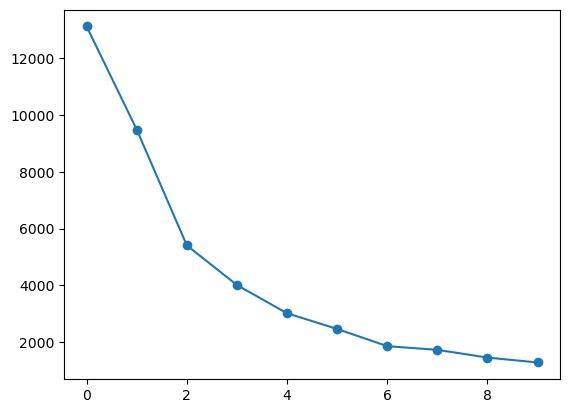

In [64]:
#elbow
plt.plot(cwss,marker="o")

In [123]:
kmean=KMeans(n_clusters=3)
kmean.fit(scaled)
RFM["cluster"]=(kmean.labels_+1)
RFM.head(3)

,recency,frequency,total,cluster
CustomerID,,,,
12346.0,347,2,0.00,3
12347.0,24,182,4310.00,1
12348.0,97,31,1797.24,1


In [125]:
group1=RFM.groupby(["cluster"])[["recency","frequency","total"]].mean()
group1# it is use to made the made the value in front of each cluster 

,recency,frequency,total
cluster,,,
1,61.696105,104.930389,1952.087630
2,26.333333,2845.583333,118713.023333
3,268.489536,27.756142,463.832367


In [126]:
def count(RFM):
    if RFM["cluster"]==1:
     return"avg cx"
    elif  RFM["cluster"]==2:
        return"whales"
    else:
        return"lapsed cx"

In [128]:
RFM["condition"]=RFM.apply(count,axis=1)
RFM

,recency,frequency,total,cluster,condition
CustomerID,,,,,
12346.0,347,2,0.00,3,lapsed cx
12347.0,24,182,4310.00,1,avg cx
12348.0,97,31,1797.24,1,avg cx
12349.0,40,73,1757.55,1,avg cx
12350.0,332,17,334.40,3,lapsed cx
...,...,...,...,...,...
18280.0,299,10,180.60,3,lapsed cx
18281.0,202,7,80.82,3,lapsed cx
18282.0,29,13,176.60,1,avg cx


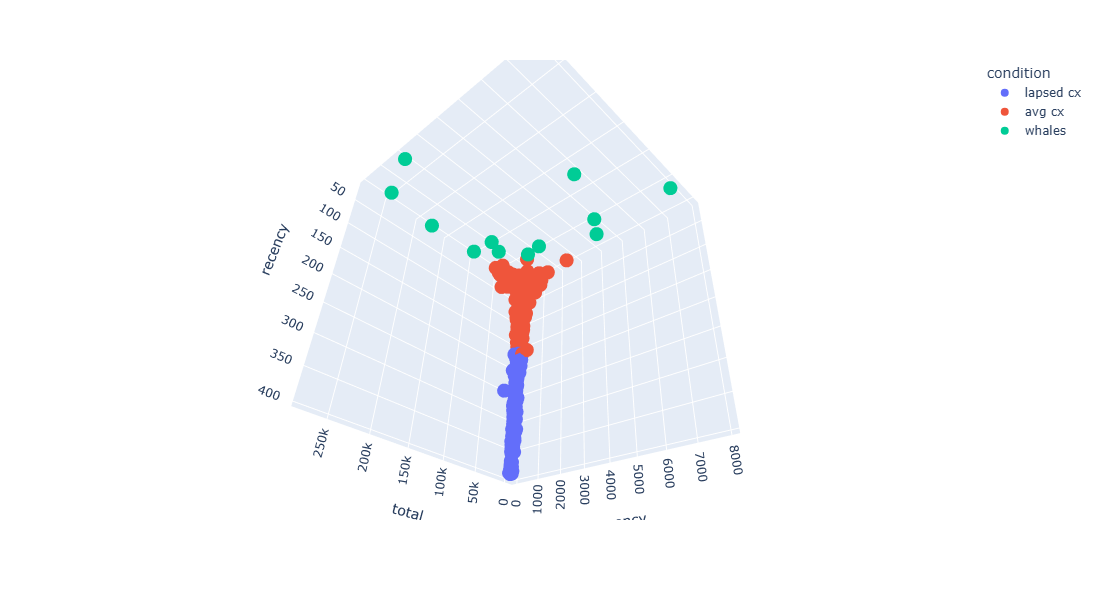

<Figure size 800x800 with 0 Axes>

In [132]:
import plotly.express as px
plt.figure(figsize=(8,8))
fig=px.scatter_3d(RFM,x=RFM["recency"],y=RFM["frequency"],z=RFM["total"],color=RFM["condition"])
fig.update_layout(width=800, height=600)
fig.show()